# Random Models

In this experiment, I generate a series of random models in order to assess the general distribution of model outcomes.

In [1]:
import copy
from collections import defaultdict, namedtuple
import random

import numpy as np
import scipy.stats
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
from negotiation_model import *
from bdm_agent import *
from bdm_replication import *


In [3]:
def make_model(N):
    '''
    Create N random agents, with uniform attributes.
    '''
    capabilities = [random.random() for _ in range(N)]
    cap_norm = sum(capabilities)
    capabilities = [c/cap_norm for c in capabilities]
    saliences = [random.random() for _ in range(N)]
    positions = [random.random() for _ in range(N)]

    agents = []
    for i in range(N):
        agent = BDMActor(str(i), capabilities[i], positions[i], saliences[i])
        agent.decision_model.Q = 0.5
        agent.decision_model.T = 0.5
        agents.append(agent)
    return Real_Negotiation_Model(agents)

In [4]:
def perturb_model(model, sd=0.1):
    '''
    Perturb the saliences of a model
    '''
    new_model = copy.deepcopy(model)
    for agent in new_model.agents:
        #agent.salience += agent.salience * random.normalvariate(0, sd)
        agent.salience += random.normalvariate(0, sd)
        agent.salience = max(0, min(1, agent.salience))
    return new_model

## Run one model multiple times

In [5]:
all_models = []
for i in range(100):
    base_model = make_model(10)
    outcomes = []
    models = []
    for j in range(100):
        model = copy.deepcopy(base_model)
        for _ in range(10):
            model.step()
        outcomes.append(model.find_median())
        models.append(model)
    all_models.append(models)

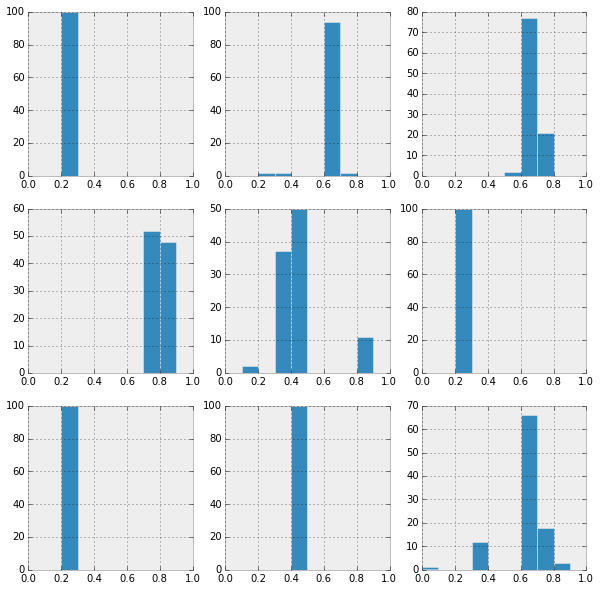

In [8]:
fig = plt.figure(figsize=(10,10))
for i, models in enumerate(all_models[:9]):
    outcomes = [m.find_median() for m in models]
    ax = fig.add_subplot(3, 3, i+1)
    ax.set_xlim(0,1)
    ax.hist(outcomes, bins=np.linspace(0,1,11))


50


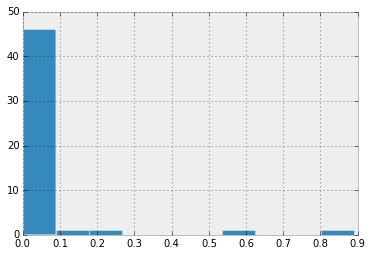

In [9]:
all_pvals = []
for model_set in all_models:
    outcomes = [m.find_median() for m in model_set]
    _, p_val = scipy.stats.mstats.normaltest(outcomes)
    if not np.ma.is_masked(p_val):
        all_pvals.append(p_val)
plt.hist(all_pvals)
print(len(all_pvals))

(array([  5.,   7.,   9.,   9.,  12.,   2.,   3.,   2.,   0.,   1.]),
 array([ 0.00248451,  0.02577113,  0.04905774,  0.07234436,  0.09563097,
         0.11891759,  0.1422042 ,  0.16549082,  0.18877744,  0.21206405,
         0.23535067]),
 <a list of 10 Patch objects>)

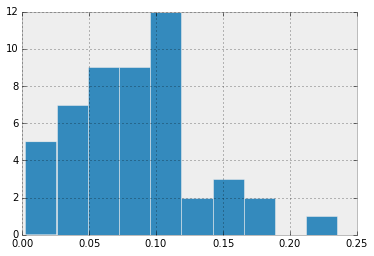

In [10]:
all_sigmas = []
for model_set in all_models:
    outcomes = [m.find_median() for m in model_set]
    _, p_val = scipy.stats.mstats.normaltest(outcomes)
    if np.ma.is_masked(p_val):
        continue
    all_sigmas.append(np.std(outcomes))
plt.hist(all_sigmas)

In [11]:
scipy.stats.mstats.normaltest(all_sigmas)

(6.3720658763514395, 0.041335526698132605)

## Run Perturbed Models

In [12]:
all_models = []
for i in range(100):
    base_model = make_model(10)
    outcomes = []
    models = []
    for j in range(100):
        model = perturb_model(base_model, 0.1)
        for _ in range(10):
            model.step()
        outcomes.append(model.find_median())
        models.append(model)
    all_models.append(models)

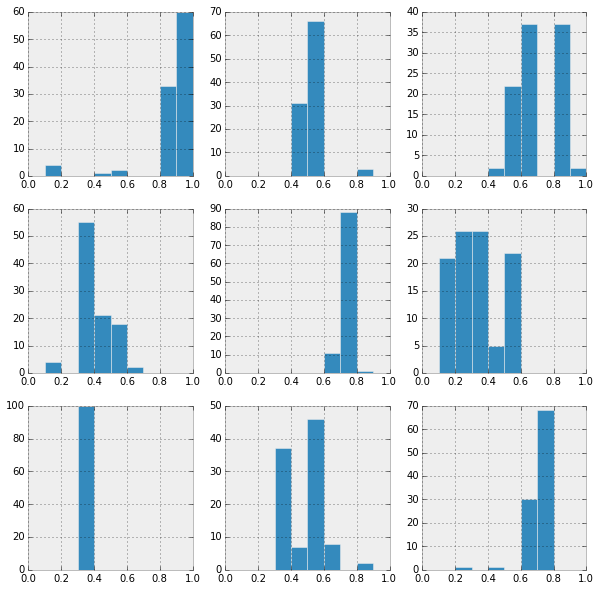

In [13]:
fig = plt.figure(figsize=(10,10))
for i, models in enumerate(all_models[:9]):
    outcomes = [m.find_median() for m in models]
    ax = fig.add_subplot(3, 3, i+1)
    ax.set_xlim(0,1)
    ax.hist(outcomes, bins=np.linspace(0,1,11))


92


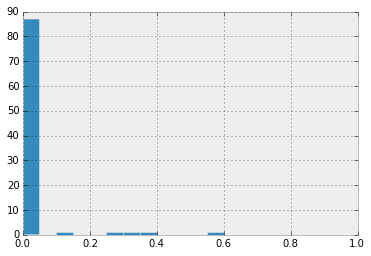

In [14]:
all_pvals = []
for model_set in all_models:
    outcomes = [m.find_median() for m in model_set]
    _, p_val = scipy.stats.mstats.normaltest(outcomes)
    if not np.ma.is_masked(p_val):
        all_pvals.append(p_val)
plt.hist(all_pvals, bins=np.linspace(0,1,21))
print(len(all_pvals))

In [15]:
len([p for p in all_pvals if p<0.01])

85

(array([ 14.,  12.,  12.,  13.,  17.,   7.,   8.,   6.,   0.,   3.]),
 array([ 0.00132383,  0.02534283,  0.04936183,  0.07338083,  0.09739982,
         0.12141882,  0.14543782,  0.16945681,  0.19347581,  0.21749481,
         0.2415138 ]),
 <a list of 10 Patch objects>)

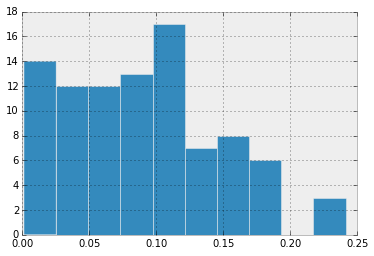

In [16]:
all_sigmas = []
for model_set in all_models:
    outcomes = [m.find_median() for m in model_set]
    _, p_val = scipy.stats.mstats.normaltest(outcomes)
    if np.ma.is_masked(p_val):
        continue
    all_sigmas.append(np.std(outcomes))
plt.hist(all_sigmas)

(array([  2.,   0.,   7.,   7.,   4.,  22.,   9.,  14.,  12.,  22.]),
 array([ 0.85315712,  0.86740088,  0.88164464,  0.8958884 ,  0.91013216,
         0.92437592,  0.93861968,  0.95286344,  0.9671072 ,  0.98135095,
         0.99559471]),
 <a list of 10 Patch objects>)

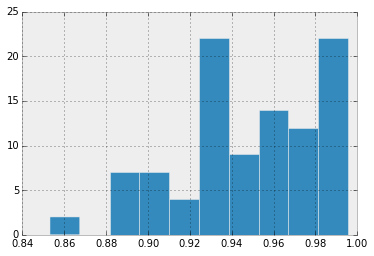

In [6]:
some_models = all_models[0]
base = some_models[0]
similarities = [base.log.tversky_index(m.log) for m in some_models[1:]]
plt.hist(similarities)

(array([  1.,   6.,  14.,  14.,   4.,  16.,  24.,  15.,   1.,   4.]),
 array([ 0.73127753,  0.74023495,  0.74919236,  0.75814978,  0.7671072 ,
         0.77606461,  0.78502203,  0.79397944,  0.80293686,  0.81189427,
         0.82085169]),
 <a list of 10 Patch objects>)

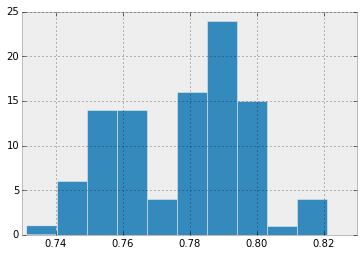

In [7]:
some_models = all_models[14]
similarities = [base.log.tversky_index(m.log) for m in some_models[1:]]
plt.hist(similarities)

# Dumb Optimization

Search through the space of possible models, try to find a decent match based on event series.

**Step 1:** Generate 100 random models, see which ones are the closest matches.

In [ ]:
def compare_logs(a, b):
    '''
    Compare two sets of events
    '''
    a_set = set(a)
    b_set = set(b)
    overlap = a_set.intersection(b_set)
    union = a_set.union(b_set)
    if len(union) == 0:
        return 0
    return len(overlap) / len(union)

In [ ]:
target = base
target_attacks = target.log.get_events(action="Attack")

random_models = [make_model(10) for _ in range(100)]
model_similarity = []
for m in random_models:
    model = copy.deepcopy(m)
    for i in range(10):
        model.step()
    attacks = model.log.get_events(action="Attack")
    match = compare_logs(target_attacks, attacks)
    model_similarity.append(match)

In [ ]:
plt.hist([x for x in model_similarity if x is not None])

**Step 2:** Take the best matching models, start modifying them.

In [ ]:
def clamp_perturb(agent, attr, sd):
    val = getattr(agent, attr)
    r = random.normalvariate(0, sd)
    val = max(0, min(1, val + val*r))
    setattr(agent, attr, val)

def tweak_model(model, sd=0.1):
    m = copy.deepcopy(model)
    # Perturb variables
    for agent in m.agents:
        for attr in ["capability", "salience", "position"]:
            clamp_perturb(agent, attr, sd)
    return m

In [ ]:
max_match = max(model_similarity)
for i in range(100):
    if model_similarity[i] == max_match:
        break
print(i)

In [ ]:
start_model = random_models[36]
second_gen = [tweak_model(start_model, 0.1) for _ in range(100)]
second_gen_similarities = []
for model in second_gen:
    m = copy.deepcopy(model)
    try:
        for _ in range(10):
            m.step()
        attacks = m.log.get_events(action="Attack")
        match = compare_logs(target_attacks, attacks)
        second_gen_similarities.append(match)
    except:
        second_gen_similarities.append(0)

plt.hist(second_gen_similarities)

In [ ]:
max_match = max(second_gen_similarities)
print(max_match)
for i in range(100):
    if second_gen_similarities[i] == max_match:
        break
print(i)

In [ ]:
for agent in second_gen[72].agents:
    print(agent)

In [ ]:
positions = [agent.position for agent in second_gen[72].agents]
capabilities = [agent.capability for agent in second_gen[72].agents]
plt.scatter(positions, capabilities)

In [ ]:
for agent in base.agents:
    print(agent)

In [ ]:
positions = [agent.position for agent in base.agents]
capabilities = [agent.capability for agent in base.agents]
plt.scatter(positions, capabilities)

In [ ]:
b = copy.deepcopy(second_gen[72])
for i in range(10):
    b.step()

In [ ]:
base.log.tversky_index(b.log)

In [ ]:
b.log.tversky_index(base.log)

In [ ]:
b.log.get_events(action="Attack")